In [1]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction, preprocessing, linear_model, model_selection


import lightgbm as lgb
from lightgbm import early_stopping
from sklearn.linear_model import Lasso
from xgboost import XGBClassifier


from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

from sklearn.model_selection import train_test_split


import seaborn as sm
import matplotlib.pyplot as plotGraph


from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import RobustScaler, MaxAbsScaler, PowerTransformer, Normalizer, StandardScaler, QuantileTransformer
from scipy.sparse import csr_matrix
from tqdm import trange

import seaborn as sns


from sklearn.metrics import roc_auc_score

In [2]:
data_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission_csv = pd.read_csv("sample_submission.csv")

In [3]:
data_df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [4]:
len(data_df.columns)

26

In [5]:
list(data_df.columns)

['id',
 'product_code',
 'loading',
 'attribute_0',
 'attribute_1',
 'attribute_2',
 'attribute_3',
 'measurement_0',
 'measurement_1',
 'measurement_2',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17',
 'failure']

In [6]:
train_df = data_df
# print(train_df)
display(train_df)
# test_df = data_df.drop(['failure'], axis=1)
display(test_df)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
20771,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210


<h3> Analyzing Missing Values <h3>

In [7]:
train_df.isna().sum().rename("train")

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
Name: train, dtype: int64

In [8]:
test_df.isna().sum().rename("test")

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
Name: test, dtype: int64

In [9]:
pd.concat([train_df.isna().sum().rename("train"), test_df.isna().sum().rename("test")], axis=1)

,train,test
id,0,0.0
product_code,0,0.0
loading,250,223.0
attribute_0,0,0.0
attribute_1,0,0.0
attribute_2,0,0.0
attribute_3,0,0.0
measurement_0,0,0.0
measurement_1,0,0.0
measurement_2,0,0.0


In [10]:
pd.concat([train_df.isna().sum().rename("train"), test_df.isna().sum().rename("test")], axis=0).rename("missing values").reset_index()

,index,missing values
0,id,0
1,product_code,0
2,loading,250
3,attribute_0,0
4,attribute_1,0
5,attribute_2,0
6,attribute_3,0
7,measurement_0,0
8,measurement_1,0
9,measurement_2,0


In [11]:
ms = pd.concat([train_df.isna().sum().rename("train"), test_df.isna().sum().rename("test")], axis=0).rename("missing values").reset_index().rename(columns={"index":"columns"})

In [12]:
ms["data"] = ["train"]*len(train_df.columns) + ["test"]*len(test_df.columns)
ms["data"]

0     train
1     train
2     train
3     train
4     train
5     train
6     train
7     train
8     train
9     train
10    train
11    train
12    train
13    train
14    train
15    train
16    train
17    train
18    train
19    train
20    train
21    train
22    train
23    train
24    train
25    train
26     test
27     test
28     test
29     test
30     test
31     test
32     test
33     test
34     test
35     test
36     test
37     test
38     test
39     test
40     test
41     test
42     test
43     test
44     test
45     test
46     test
47     test
48     test
49     test
50     test
Name: data, dtype: object

<AxesSubplot:xlabel='missing values', ylabel='columns'>

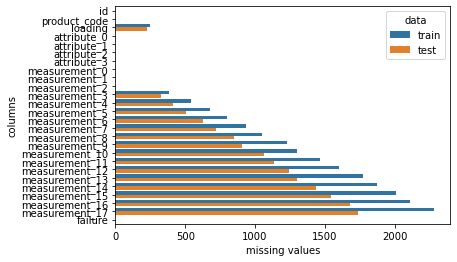

In [13]:
sm.barplot(data = ms, x="missing values", y="columns", hue="data", orient="h")

<h3> Analyzing Categorical Data <h3>

<p> Categorical data is data that can be grouped. Fixed number of possible values (i.e sex, education status) </p>
    
<p> Foure columns contain categorical data in this dataset: failure, product code, attribute_0, attribute 1) </p>

In [14]:
train_df.product_code.value_counts()

C    5765
E    5343
B    5250
D    5112
A    5100
Name: product_code, dtype: int64

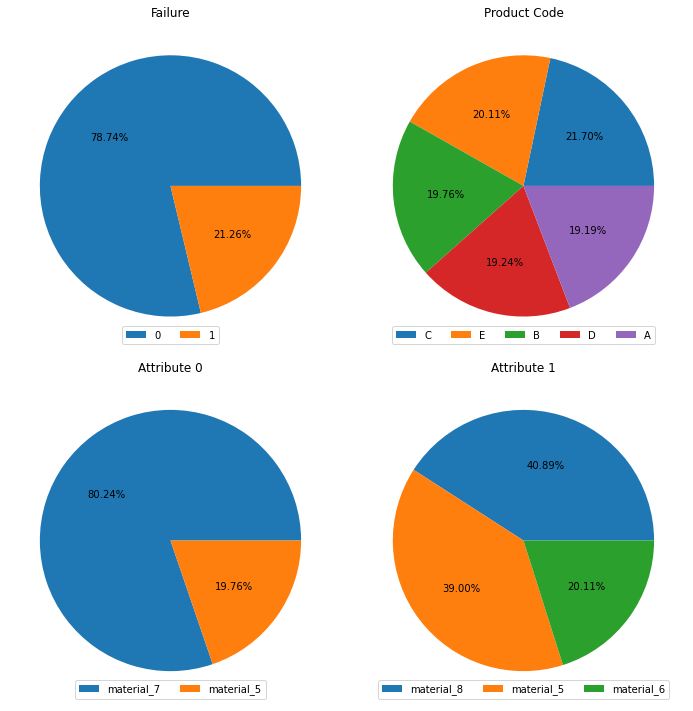

In [15]:
figure, axis = plotGraph.subplots(2,2,figsize=(10,10))

axis[0][0].pie(train_df.failure.value_counts(), autopct="%1.2f%%")
axis[0][0].legend(train_df.failure.value_counts().index , ncol= len( train_df.failure.value_counts().index) , loc="lower center")
axis[0][0].set_title("Failure")


axis[0][1].pie(train_df.product_code.value_counts(), autopct="%1.2f%%")
axis[0][1].legend(train_df.product_code.value_counts().index, ncol= len( train_df.product_code.value_counts().index) , loc="lower center")
axis[0][1].set_title("Product Code")



axis[1][0].pie(train_df.attribute_0.value_counts(), autopct="%1.2f%%")
axis[1][0].legend(train_df.attribute_0.value_counts().index, ncol= len( train_df.attribute_0.value_counts().index) , loc="lower center")
axis[1][0].set_title("Attribute 0")


axis[1][1].pie(train_df.attribute_1.value_counts(), autopct="%1.2f%%")
axis[1][1].legend(train_df.attribute_1.value_counts().index, ncol= len( train_df.attribute_1.value_counts().index) , loc="lower center")
axis[1][1].set_title("Attribute 1")

figure.tight_layout()

<h3>Converting Text to Numbers<h3>

<p> most machine learning models need the data to be in number format <p>

In [16]:
#product code

In [17]:
np.array(train_df["product_code"]) 

array(['A', 'A', 'A', ..., 'E', 'E', 'E'], dtype=object)

In [18]:
le_pc_train = preprocessing.LabelEncoder()
le_pc_test = preprocessing.LabelEncoder()
fitted_le_pc = le_pc_train.fit(np.array(train_df["product_code"]) )
fitted_le_pc_test = le_pc_test.fit(np.array(test_df["product_code"]) )

In [19]:
le_transformed_train = fitted_le_pc.transform(np.array(train_df["product_code"]))
le_transformed_train

array([0, 0, 0, ..., 4, 4, 4])

In [20]:
le_transformed_test = fitted_le_pc_test.transform(np.array(test_df["product_code"]))
le_transformed_test

array([0, 0, 0, ..., 3, 3, 3])

In [21]:
train_df["product_code"] = pd.DataFrame(le_transformed_train)
test_df["product_code"] = pd.DataFrame(le_transformed_test)
display(train_df["product_code"])
display(test_df["product_code"])

0        0
1        0
2        0
3        0
4        0
        ..
26565    4
26566    4
26567    4
26568    4
26569    4
Name: product_code, Length: 26570, dtype: int64

0        0
1        0
2        0
3        0
4        0
        ..
20770    3
20771    3
20772    3
20773    3
20774    3
Name: product_code, Length: 20775, dtype: int64

In [22]:
#attribute 0

In [23]:
np.array(train_df["attribute_0"]) 

array(['material_7', 'material_7', 'material_7', ..., 'material_7',
       'material_7', 'material_7'], dtype=object)

In [24]:
le_pc_train = preprocessing.LabelEncoder()
le_pc_test = preprocessing.LabelEncoder()
fitted_le_pc = le_pc_train.fit(np.array(train_df["attribute_0"]) )
fitted_le_pc_test = le_pc_test.fit(np.array(test_df["attribute_0"]) )

In [25]:
le_transformed = fitted_le_pc.transform(np.array(train_df["attribute_0"]))
le_transformed

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
le_transformed_test = fitted_le_pc_test.transform(np.array(test_df["attribute_0"]))
le_transformed_test

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
train_df["attribute_0"] = pd.DataFrame(le_transformed)
test_df["attribute_0"] = pd.DataFrame(le_transformed_test)
display(train_df["attribute_0"])
display(test_df["attribute_0"])

0        1
1        1
2        1
3        1
4        1
        ..
26565    1
26566    1
26567    1
26568    1
26569    1
Name: attribute_0, Length: 26570, dtype: int64

0        0
1        0
2        0
3        0
4        0
        ..
20770    1
20771    1
20772    1
20773    1
20774    1
Name: attribute_0, Length: 20775, dtype: int64

In [28]:
#attribute 1

In [29]:
np.array(train_df["attribute_1"]) 

array(['material_8', 'material_8', 'material_8', ..., 'material_6',
       'material_6', 'material_6'], dtype=object)

In [30]:
le_pc_train = preprocessing.LabelEncoder()
le_pc_test = preprocessing.LabelEncoder()
fitted_le_pc = le_pc_train.fit(np.array(train_df["attribute_1"]) )
fitted_le_pc_test = le_pc_test.fit(np.array(test_df["attribute_1"]) )

In [31]:
le_transformed = fitted_le_pc.transform(np.array(train_df["attribute_1"]))
le_transformed

array([2, 2, 2, ..., 1, 1, 1])

In [32]:
le_transformed_test = fitted_le_pc_test.transform(np.array(test_df["attribute_1"]))
le_transformed_test

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
train_df["attribute_1"] = pd.DataFrame(le_transformed)
test_df["attribute_1"] = pd.DataFrame(le_transformed_test)
display(train_df["attribute_1"])
display(test_df["attribute_1"])

0        2
1        2
2        2
3        2
4        2
        ..
26565    1
26566    1
26567    1
26568    1
26569    1
Name: attribute_1, Length: 26570, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
20770    0
20771    0
20772    0
20773    0
20774    0
Name: attribute_1, Length: 20775, dtype: int64

In [34]:
train_df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,0,80.10,1,2,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,0,84.89,1,2,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,0,82.43,1,2,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,0,101.07,1,2,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,0,188.06,1,2,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,4,158.95,1,1,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,4,146.02,1,1,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,4,115.62,1,1,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,4,106.38,1,1,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


<h3> Fill Missing Data Using Linear Interpolation <h>

In [35]:
train_df = train_df.interpolate(axis=1)
test_df = test_df.interpolate(axis=1)

display(train_df)
display(test_df)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0.0,0.0,80.10,1.0,2.0,9.0,5.0,7.0,8.0,4.0,...,10.6720,15.859,17.5940,15.193,15.029,14.0315,13.034,14.6840,764.100,0.0
1,1.0,0.0,84.89,1.0,2.0,9.0,5.0,14.0,3.0,3.0,...,12.4480,17.947,17.9150,11.755,14.732,15.4250,14.395,15.6310,682.057,0.0
2,2.0,0.0,82.43,1.0,2.0,9.0,5.0,12.0,1.0,5.0,...,12.7150,15.607,14.7025,13.798,16.711,18.6310,14.094,17.9460,663.376,0.0
3,3.0,0.0,101.07,1.0,2.0,9.0,5.0,13.0,2.0,6.0,...,12.4710,16.346,18.3770,10.020,15.250,15.5620,16.154,17.1720,826.282,0.0
4,4.0,0.0,188.06,1.0,2.0,9.0,5.0,9.0,2.0,8.0,...,10.3370,17.082,19.9320,12.428,16.182,12.7600,13.153,16.4120,579.885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565.0,4.0,158.95,1.0,1.0,6.0,9.0,6.0,16.0,4.0,...,15.7655,12.177,17.9420,10.112,15.795,18.5720,16.144,372.6375,729.131,0.0
26566,26566.0,4.0,146.02,1.0,1.0,6.0,9.0,10.0,12.0,8.0,...,11.2420,14.179,20.5640,10.234,14.450,14.3220,13.146,16.4710,853.924,0.0
26567,26567.0,4.0,115.62,1.0,1.0,6.0,9.0,1.0,10.0,1.0,...,11.4070,16.437,17.4760,8.668,15.069,16.5990,15.590,14.0650,750.364,0.0
26568,26568.0,4.0,106.38,1.0,1.0,6.0,9.0,2.0,9.0,4.0,...,11.3920,17.064,17.8140,14.928,16.273,15.4850,13.624,12.8650,730.156,0.0


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570.0,0.0,119.57,0.0,1.0,6.0,4.0,6.0,9.0,6.0,...,18.654,10.802,15.909,18.0700,13.772,13.659,16.825,13.742,17.7100,634.612
1,26571.0,0.0,113.51,0.0,1.0,6.0,4.0,11.0,8.0,0.0,...,19.368,12.032,13.998,13.2355,12.473,17.468,16.708,14.776,14.1020,537.037
2,26572.0,0.0,112.16,0.0,1.0,6.0,4.0,8.0,12.0,4.0,...,17.774,11.743,17.046,18.0860,10.907,13.363,15.737,17.065,16.0210,658.995
3,26573.0,0.0,112.72,0.0,1.0,6.0,4.0,8.0,11.0,10.0,...,18.948,11.790,18.165,16.1630,10.933,15.501,15.667,12.620,16.1110,594.301
4,26574.0,0.0,208.00,0.0,1.0,6.0,4.0,14.0,16.0,8.0,...,19.141,12.370,14.578,17.8490,11.941,16.070,16.183,13.324,17.1500,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340.0,3.0,144.74,1.0,0.0,9.0,5.0,0.0,4.0,9.0,...,18.573,11.691,15.731,19.7710,11.562,17.246,15.131,15.209,355.8375,696.466
20771,47341.0,3.0,74.53,1.0,0.0,9.0,5.0,4.0,8.0,7.0,...,17.917,10.980,16.027,15.6940,13.564,15.494,15.296,13.812,16.5010,613.249
20772,47342.0,3.0,67.73,1.0,0.0,9.0,5.0,10.0,11.0,2.0,...,19.630,10.436,16.137,20.6120,11.134,16.519,15.525,14.175,17.7280,783.349
20773,47343.0,3.0,126.15,1.0,0.0,9.0,5.0,8.0,16.0,11.0,...,19.575,12.672,15.422,19.4960,9.319,15.817,17.403,16.437,15.1790,745.210


<h3> Evaluate Cross Validation Scores to Pick Best Performing Model <h3>

In [36]:
x_train = train_df.drop(["failure"], axis = 1)
y_train = train_df["failure"]

In [37]:
#logisic regression CV score

In [38]:
logisticRegressionFitted = linear_model.LogisticRegression(random_state=0, max_iter = 1000).fit(x_train, y_train)

In [39]:
logisticRegressionScores = model_selection.cross_val_score(logisticRegressionFitted, x_train, y_train, cv=5, scoring="roc_auc" )

In [40]:
np.mean(logisticRegressionScores)

0.5823094296448589

In [41]:
#LGBM Classifier CV score

In [42]:
lgbmC = lgb.LGBMClassifier()

In [43]:
lgbmScores = model_selection.cross_val_score(lgbmC, x_train, y_train, cv=5, scoring="roc_auc" )

In [44]:
np.mean(lgbmScores)

0.5956599840868764

In [45]:
#XGB Classifier CV score

In [46]:
xgbC = XGBClassifier()

In [47]:
xgbScores = model_selection.cross_val_score(xgbC, x_train, y_train, cv=5, scoring="roc_auc" )

In [48]:
np.mean(xgbScores)

0.5789063747186103

<h3>Predictions<h3>

In [49]:
# sc = StandardScaler()

In [50]:
# x_train = sc.fit_transform(x_train)

In [51]:
# x_test  = sc.fit_transform(test_df)

In [52]:
lgbmCFitted = lgbmC.fit(x_train, y_train)

In [53]:
lgbmCPredictions = lgbmCFitted.predict(test_df)

In [54]:
lgbmCPredictions_Proba = lgbmCFitted.predict_proba(test_df)

<h3> Find Useful Features <h3>

In [55]:
# create a correlation matrix table using all columns in training data
train_df_correlated_table = train_df.corr(method = 'pearson')
print(train_df_correlated_table)

                      id  product_code   loading  attribute_0  attribute_1  \
id              1.000000      0.979614  0.001728     0.359716    -0.293192   
product_code    0.979614      1.000000  0.003315     0.358915    -0.302747   
loading         0.001728      0.003315  1.000000     0.003768    -0.001010   
attribute_0     0.359716      0.358915  0.003768     1.000000     0.565822   
attribute_1    -0.293192     -0.302747 -0.001010     0.565822     1.000000   
attribute_2    -0.741200     -0.755114 -0.007262    -0.420080    -0.038467   
attribute_3     0.558881      0.577926 -0.001170    -0.258784    -0.135736   
measurement_0  -0.253626     -0.258819 -0.004747     0.178827     0.215974   
measurement_1   0.400206      0.409682  0.002950    -0.025801    -0.264908   
measurement_2   0.000128      0.001743  0.000846    -0.224830    -0.283106   
measurement_3  -0.007330     -0.006595 -0.000528     0.000373     0.003301   
measurement_4   0.012526      0.012620 -0.009853     0.008722   

Text(0.5, 1.0, 'Title: Correlation Matrix Heatmap')

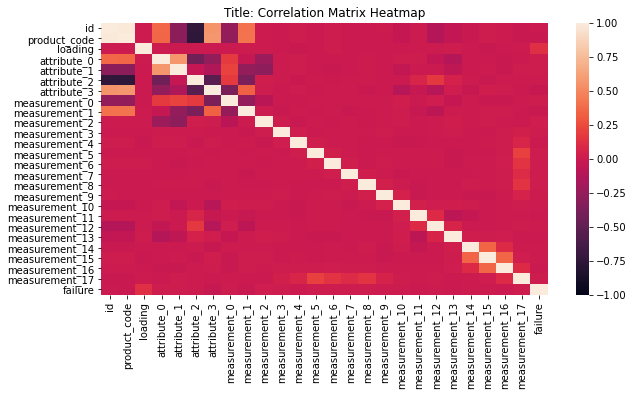

In [56]:
figure, axis = plotGraph.subplots(figsize=(10,5))

# show only the correlations between explanatory variables
sns.heatmap(ax = axis, data=train_df_correlated_table, vmin=-1, vmax=1)


# title for graph 
axis.set_title('Title: Correlation Matrix Heatmap')

In [57]:
lgbmC.feature_importances_

array([139,   0, 175,   7,  13,   5,   8,  69,  54,  74, 144, 147, 166,
       143, 131, 121, 129, 129, 131, 124, 151, 135, 161, 312, 332],
      dtype=int32)

In [58]:
feature_imp = pd.DataFrame( sorted( zip(lgbmC.feature_importances_, test_df.columns) ), columns=["Values", "Features"] )

<AxesSubplot:xlabel='Values', ylabel='Features'>

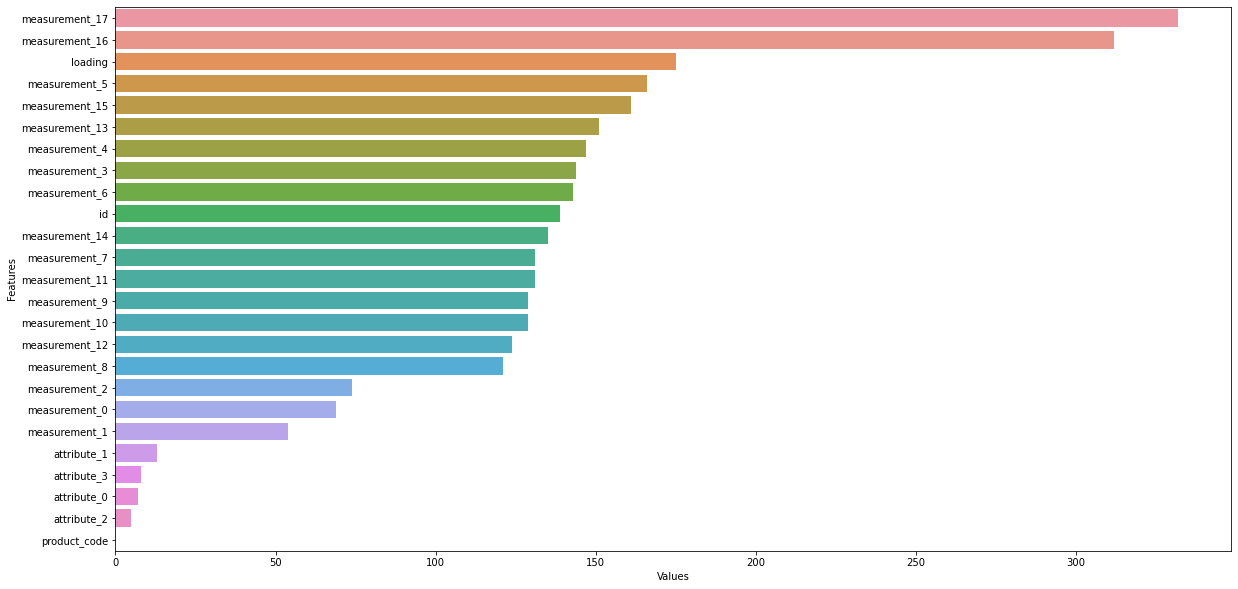

In [59]:
plotGraph.figure(figsize = (20,10))
sns.barplot(x="Values", y="Features", data = feature_imp.sort_values(by="Values", ascending=False))

In [60]:
# heatmap and feature_importance both agree loading and measurement_17 is an important feature 

# cv score is 0.5796279527291792 when I only use "measurement_17","loading" as features so will add additional features to model from feature_importance 

In [61]:
# test_df_imp = test_df[["measurement_17","loading"]]
# train_df_imp = train_df[["measurement_17","loading"]]

test_df_imp = test_df[["measurement_17","measurement_16","loading","measurement_5","measurement_15"]]
train_df_imp = train_df[["measurement_17","measurement_16","loading","measurement_5","measurement_15"]]

<h3> Train Using Early Stopping <h3>

In [62]:
# train and split data
x_train_imp, x_test_imp, y_train_imp, y_test_imp = train_test_split(train_df_imp, y_train, test_size=.2, random_state=1)

In [63]:
lgbmC_imp = lgb.LGBMClassifier()

In [64]:
trainandsplitdata = model_selection.cross_val_score(lgbmC_imp, train_df_imp, y_train, cv=5, scoring="roc_auc" )

In [65]:

np.mean(trainandsplitdata)

0.6310474649576261

In [66]:
lgbmC_imp_Fitted = lgbmC_imp.fit(train_df_imp, y_train, eval_set=[(x_test_imp,y_test_imp)],
                                 eval_metric="roc_auc",
                                 callbacks=[early_stopping(stopping_rounds=20,
                                                          first_metric_only=False)])

Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.428394


In [67]:
lgbmC_imp_bestIter = lgb.LGBMClassifier(n_estimators=100)

In [68]:
lgbmC_imp_Fitted_bestIter = lgbmC_imp_bestIter.fit(train_df_imp, y_train)

In [69]:
# using proba
lgbmCPredictions_Proba_imp_bestIter = lgbmC_imp_Fitted_bestIter.predict_proba(test_df_imp)

In [70]:
# not using proba
lgbmCPredictions_imp_bestIter = lgbmC_imp_Fitted_bestIter.predict(test_df_imp)

In [71]:
# submission = pd.DataFrame()
submission_csv["id"] = test_df["id"].astype(int)
submission_csv["failure"] = lgbmCPredictions_imp_bestIter
submission_csv

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,0.0
...,...,...
20770,47340,0.0
20771,47341,0.0
20772,47342,0.0
20773,47343,0.0


In [72]:
submission_csv.to_csv("aug_tablular_lgbm_attempt11_5_features_early_stopping.csv", index=False)